# Decision trees

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [13]:
df_filter = df.drop(["Name", "Fare"], axis=1)

In [14]:
df_filter

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
882,0,2,male,27.0,0,0
883,1,1,female,19.0,0,0
884,0,3,female,7.0,1,2
885,1,1,male,26.0,0,0


In [16]:
df_filter.columns = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch"]
df_filter.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [17]:
df_filter.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [18]:
df_filter = pd.get_dummies(df_filter, columns=["Sex"], drop_first=True)
df_filter

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1
...,...,...,...,...,...,...
882,0,2,27.0,0,0,1
883,1,1,19.0,0,0,0
884,0,3,7.0,1,2,0
885,1,1,26.0,0,0,1


In [19]:
df_filter.rename(columns={"Sex_male":"Sex"}, inplace=True)

In [20]:
df_filter.head()

,Survived,Pclass,Age,SibSp,Parch,Sex
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [23]:
X = df_filter.drop(["Survived"], axis=1)
y = df_filter["Survived"]

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=00000)

In [47]:
tree = DecisionTreeClassifier(max_depth=2, random_state=00000)

In [48]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [49]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [50]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("train_accuracy :", train_accuracy)
print("test_accuracy :", test_accuracy)

train_accuracy : 0.8048387096774193
test_accuracy : 0.7640449438202247


c:\Users\rodri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


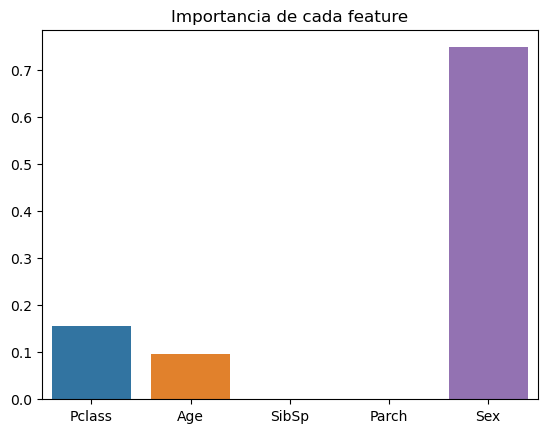

In [51]:
importances = tree. feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title("Importancia de cada feature")
plt.show()

# Proyecto de Decision Tree

In [52]:
df_car = pd.read_csv("car_evaluation.csv")

In [53]:
df_car.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [54]:
df_car.shape

(1727, 7)

In [56]:
df_car.dtypes

vhigh      object
vhigh.1    object
2          object
2.1        object
small      object
low        object
unacc      object
dtype: object